In [1]:
!pip freeze --user > requirements.txt
!while read p; do pip install --user "${p}" --ignore-installed ; done <./requirements.txt

  Using cached certifi-2017.7.27.1-py2.py3-none-any.whl
  Using cached chardet-3.0.4-py2.py3-none-any.whl
  Using cached requests-2.18.3-py2.py3-none-any.whl
  Using cached six-1.10.0-py2.py3-none-any.whl
  Using cached enum34-1.1.6-py2-none-any.whl
  Using cached idna-2.5-py2.py3-none-any.whl
  Using cached urllib3-1.22-py2.py3-none-any.whl
  Using cached chardet-3.0.4-py2.py3-none-any.whl
  Using cached certifi-2017.7.27.1-py2.py3-none-any.whl
  Using cached requests-2.18.3-py2.py3-none-any.whl
  Using cached futures-3.1.1-py2-none-any.whl
  Using cached six-1.10.0-py2.py3-none-any.whl
  Using cached enum34-1.1.6-py2-none-any.whl
  Using cached idna-2.5-py2.py3-none-any.whl
  Using cached urllib3-1.22-py2.py3-none-any.whl
  Using cached chardet-3.0.4-py2.py3-none-any.whl
  Using cached certifi-2017.7.27.1-py2.py3-none-any.whl
  Using cached enum34-1.1.6-py2-none-any.whl
  Using cached futures-3.1.1-py2-none-any.whl
  Using cached idna-2.5-py2.py3-none-any.whl
  Using cached requests-

In [27]:
from io import StringIO
import requests
import json
import pandas as pd
import os 
import numpy as np
from scipy import *
import scipy.linalg as lg
import matplotlib.pyplot as plt

In [28]:
# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_61d8d0026e75d3be7f12e9e3049485ecaf9a8545','domain': {'id': '62cda8210ff64bc0847826085986364d'},
            'password': 'a{VO6~(dbXVRA7j1'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

In [29]:
def import_data():
    #import dictionary 
    df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Offline_Dictionary.csv'))
    df_data_1.head()
    Dictionary=df_data_1.values 
    df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Rank_dic.csv'))
    rank_dic=df_data_2.values 
    #import 12 testing datasets into list Testdata
    df_data_3 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Generator_Trip13.csv'))
    df_data_4 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Generator_Trip14.csv'))
    df_data_5 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Generator_Trip15.csv'))
    df_data_6 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Three_Phase_Short_Circuit3.csv'))
    df_data_7 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Three_Phase_Short_Circuit67.csv'))
    df_data_8 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Three_Phase_Short_Circuit1.csv'))
    df_data_9 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Load_Change31.csv'))
    df_data_10 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Load_Change44.csv'))
    df_data_11 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Load_Change45.csv')) 
    df_data_12 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Line_Trip3.csv'))
    df_data_13 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Line_Trip2.csv'))
    df_data_14 = pd.read_csv(get_object_storage_file_with_credentials_9ef91f6a6f554e9fa22e8e2dab2d4852('DefaultProjectliw14rpiedu', 'Line_Trip41.csv'))
    Testdata=[]
    Testdata.append(df_data_3.values);Testdata.append(df_data_4.values);Testdata.append(df_data_5.values)
    Testdata.append(df_data_6.values);Testdata.append(df_data_7.values);Testdata.append(df_data_8.values)
    Testdata.append(df_data_9.values);Testdata.append(df_data_10.values);Testdata.append(df_data_11.values)
    Testdata.append(df_data_12.values);Testdata.append(df_data_13.values);Testdata.append(df_data_14.values)
    return Dictionary, rank_dic, Testdata

In [30]:
def angle0(F=None,G=None ): # this function is used to compute subspace angle
    QF=lg.orth(F)
    QG=lg.orth(G) 
    q=min(QF.shape[1],QG.shape[1]) 
    M=np.matmul(QF.T,QG) 
    Ys,s,Zs=lg.svd(M)  
    a=0  
    for i in arange(0,size(s)).reshape(-1):
        a=a + s[i] ** 2
    a1=sqrt(a / q)
    theta=np.arccos(a1) 
    theta= theta*180 / pi
    theta=abs(theta)
    return theta

In [31]:
def Event_Identification(thres=None,gap=None,Testdata=None,event_num=None, Dictionary=None, rank_dic=None): # this function is to identify the type of events
    """ The main idea of this algorithm is to compute the subspaces (represented by dominant part of matrix V ) of each test dataset, compare these subspaces with the Dictionary, and the minimum subspace angle 
    determine the type of the testdata"""
    # initialize
    min_angle=[] 
    type_=[]
    E=[]
    index_min=[]
    voltage=[]
    Vk=[]
    for p in arange(0,event_num).reshape(-1):
        bus_v=Testdata[p] 
        if p < 3:
            t01=51
            t02=151 
            X= (bus_v[0:67,:])  
        elif p < 6:
            t01=71
            t02=171 
            X= (bus_v[0:68,:]) 
        elif p <9 :
            t01=101
            t02=201
            X= (bus_v[0:68,:])         
        elif p < 12:
            t01=51
            t02=151
            X= (bus_v[0:68,:])
        else:
            print 'Please choose from 0 to 11' 
        ## compute subspace
        row,col=X.shape
        voltage.append(X[:,0:400:3])
        for i in arange(0,row).reshape(-1):
            X[i,:]=X[i,:] -  mean(X[i,0:t01])*ones([1,col])
        U, s1, Vh = lg.svd(X[:,t01-1:t02:3]) 
        V = Vh.T  
        sums=0
        ratios=0
        x=0 
        while ratios < thres:
            sums=sums + s1[x]
            ratios=sums / sum(s1) 
            x=x + 1
        dis=[]
        for i in arange(0,x).reshape(-1):
            dis.append(s1[i] / s1[x])
        gap_num=[] 
        for inde,val in enumerate(dis):
            if val > gap:
                gap_num.append(inde)  
        if not gap_num:
            gap_num=1
        k1= max(gap_num)  
        Vk.append(V[:,0:k1])
        E.append(sum(s1[0:k1+1]))
        angles=[] 
        for i in arange(0,49).reshape(-1):
            k12=max(k1,rank_dic[0,i]) 
            theta=angle0(V[:,0:k12],Dictionary[:, 6*i:6*i+k12])  
            angles.append(theta)    
       # identify the type of events by the minimum subspace angle min_angle. The index of the corresponding dictionary atom tells the event type
        min_angle.append(min(angles)) 
        for inde1,val1 in enumerate(angles):
            if np.equal(val1,min_angle[p]):
                index_min.append(inde1)        
        if index_min[p] < 12:
            #for Generator trip and line trip events, energy criterion E and its threshold 0.67 are used to distinguish them further
            if E[p] > 0.67: 
                type_.append('Generator Trip' )
            else:
                type_.append('Line Trip') 
        elif index_min[p] < 19:
                type_.append('Generator Trip') 
        elif index_min[p] < 41:
                type_.append('Three Phase Short Circuit' )
        else:
                type_.append('Load Change')  

    return min_angle,type_,E,voltage,Vk

In [32]:
def main():   
    ## parameters
    thres=0.99 
    gap=10
    event_num=12 # The total number of testing samples 
    #import data
    Dictionary, rank_dic, Testdata=import_data()
    # Identify event type by computing subspace angle
    min_angle,type_,E,voltage,Vk= Event_Identification(thres,gap,Testdata,event_num, Dictionary, rank_dic)
    # select the event
    num=input('Please select the number of the event you want to test: \n')
    if num > event_num:
        print 'please select the number less than ' + str(event_num )
        num=input('Please select the number of the event you want to test: \n')
        print 'This is a '+ str(type_[num]) +' event \n' 
        print 'The minimum subspace angle is '+"{:.2f}".format(min_angle[num])  +' degree \n' 
    else:
        print 'This is a '+ str(type_[num]) +' event \n' 
        print 'The minimum subspace angle is '+"{:.2f}".format(min_angle[num])  +' degree \n' 
    plt.figure
    plt.plot(voltage[num].T)
    plt.xlabel('Time  (0.03 second)')
    plt.ylabel('Voltage (p.u.)') 
    plt.grid(True)
    plt.show()
    plt.figure
    plt.plot(Vk[num])
    plt.xlabel('Time (0.03 second)')
    plt.ylabel('Dominant Singular Vectors') 
    plt.grid(True)
    plt.show()

Please select the number of the event you want to test: 
9
This is a Line Trip event 

The minimum subspace angle is 1.66 degree 



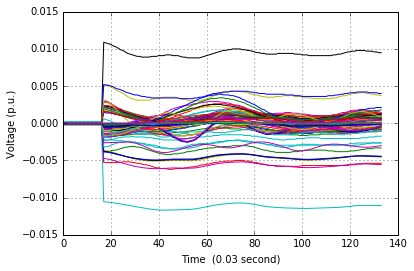

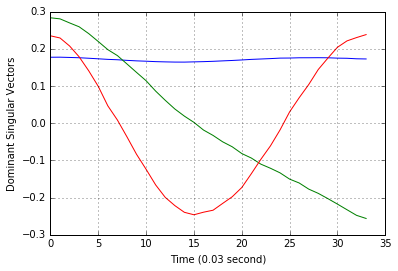

In [33]:
if __name__=='__main__':
    main()